In [2]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

In [3]:
# Agroplem evaluation results file
ev = pd.read_excel('input/Agroplem_EBV_3900000.xlsx')
ev.head(2)

,GID,Пол,Nanimal,Кличка,Номер,Дата рождения,GID отца,GID матери,Инбридинг по родству,Породность HO,...,"Оценка по жиру, %","Оценка по жиру, кг","Оценка по белку, %","Оценка по белку, кг","Удой за 305 дней 1 лакт, кг","Жир за 305 дней 1 лакт, %","Жир за 305 дней 1 лакт, кг","Белок за 305 дней 1 лакт, %","Белок за 305 дней 1 лакт, кг",Год
0,XXRUS390000702051,F,4390000000007,None,2051,15.05.2019,HOUSA000070694639,XXRUS390007401509,0.021214,75.286458,...,-0.050578,1.809101,-0.012634,4.739730,7553.86,3.42,254.29,3.31,241.46,2019
1,XXRUS390005400501,F,2390000000254,None,501,03.07.2018,HOUSA000071074520,XXRUS390008501156,0.006036,75.132388,...,0.106842,-11.918787,0.189150,-17.657072,6056.23,NaN,NaN,3.91,241.55,2018


In [8]:
# How many animals do we have each year
ev[['GID','Год']].groupby('Год').count()

,GID
Год,
2017,56
2018,221
2019,215
2020,169


In [6]:
# main parameters progress
mainComp = ev[['Инбридинг по родству', 'Породность HO','Год']]
mainComp.groupby('Год').mean()

,Инбридинг по родству,Породность HO
Год,,
2017,0.010820,74.863787
2018,0.015016,75.246995
2019,0.013576,74.129380
2020,0.015451,78.596080


In [5]:
# evaluation and real yeld progress
evalComp = ev[['Оценка по удою, кг', 'Оценка по жиру, %', 'Оценка по жиру, кг',
       'Оценка по белку, %', 'Оценка по белку, кг',
       'Удой за 305 дней 1 лакт, кг', 'Жир за 305 дней 1 лакт, %',
       'Жир за 305 дней 1 лакт, кг', 'Белок за 305 дней 1 лакт, %',
       'Белок за 305 дней 1 лакт, кг', 'Год']]
evalComp.groupby('Год').mean()

,"Оценка по удою, кг","Оценка по жиру, %","Оценка по жиру, кг","Оценка по белку, %","Оценка по белку, кг","Удой за 305 дней 1 лакт, кг","Жир за 305 дней 1 лакт, %","Жир за 305 дней 1 лакт, кг","Белок за 305 дней 1 лакт, %","Белок за 305 дней 1 лакт, кг"
Год,,,,,,,,,,
2017,-272.229699,-0.011812,-3.490756,0.025376,-3.826570,7368.113214,3.557857,266.299630,3.329216,239.688776
2018,-14.895033,-0.038269,-6.315321,-0.016595,-3.222237,7845.851312,3.558992,285.642966,3.395876,262.435421
2019,387.100645,-0.003666,12.685885,0.021894,17.636247,7461.532293,4.121654,311.397364,3.595070,263.525683
2020,224.808376,-0.021133,8.197387,-0.001761,8.985481,NaN,NaN,NaN,NaN,NaN


<Figure size 648x648 with 0 Axes>

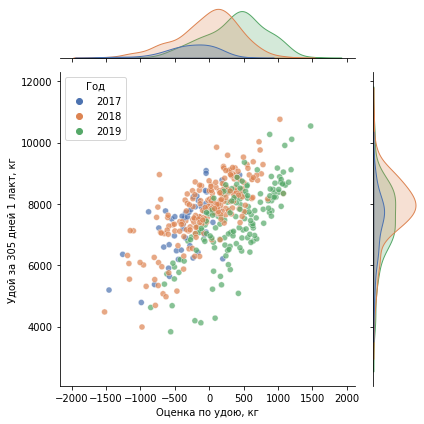

In [61]:
# Do we have progress in yeld?
evP = ev[ev['Год'] != 2020]
plt.figure(figsize=(9, 9))
sns.jointplot(x='Оценка по удою, кг',y='Удой за 305 дней 1 лакт, кг', data=evP, hue = 'Год', 
                palette="deep", alpha = 0.7)
plt.tight_layout()
plt.savefig('results/Yeld_comp.jpg', dpi=150)

<Figure size 648x648 with 0 Axes>

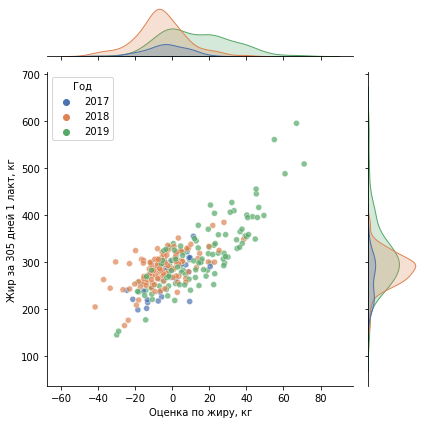

In [62]:
# Do we have progress in yeld?
evP = ev[ev['Год'] != 2020]
plt.figure(figsize=(9, 9))
sns.jointplot(x='Оценка по жиру, кг',y='Жир за 305 дней 1 лакт, кг', data=evP, hue = 'Год', 
                palette="deep", alpha = 0.7)
plt.tight_layout()
plt.savefig('results/Fat_comp.jpg', dpi=150)

<Figure size 648x648 with 0 Axes>

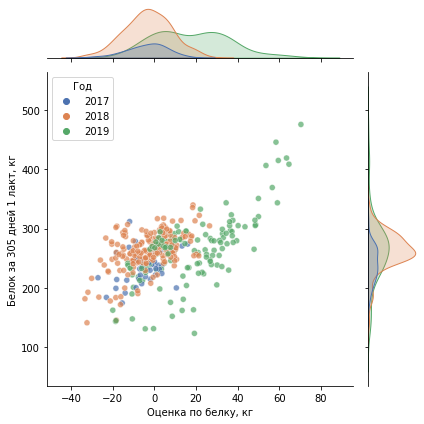

In [63]:
# Do we have progress in yeld?
evP = ev[ev['Год'] != 2020]
plt.figure(figsize=(9, 9))
sns.jointplot(x='Оценка по белку, кг',y='Белок за 305 дней 1 лакт, кг', data=evP, hue = 'Год', 
                palette="deep", alpha = 0.7)
plt.tight_layout()
plt.savefig('results/Prot_comp.jpg', dpi=150)

Вывод: оценка животных следующго года по удою и по белку в среднем выше, а реальные значения нет. Возможная причина плохое сожержание?

Conclusion: next year's milk and protein evaluations are higher on average, but the real values are not. Possible reason for poor management?